# APP_REVIEW_DATASET


### Importing Liabraries 

In [ ]:
import numpy as np  
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [1]:
import numpy as np  
import pandas as pd

In [2]:
df = pd.read_csv('googleplaystore_user_reviews.csv')
df.head()
df.shape

(64295, 5)

In [3]:
data=df.drop(['App','Sentiment_Polarity','Sentiment_Subjectivity'],axis = 1)
data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [4]:
data1 = data.iloc[:5000,:]  # it reads 0 to 5000 rows 
print(data1.shape)

(5000, 2)


## Preprocessing of the data

In [5]:
data1.isnull().sum()

Translated_Review    1901
Sentiment            1900
dtype: int64

In [6]:
data1.dropna(axis = 0,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data1.isnull().sum()

Translated_Review    0
Sentiment            0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data1['Sentiment']=lb.fit_transform(data1['Sentiment'])
data1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,2
1,This help eating healthy exercise regular basis,2
3,Works great especially going grocery store,2
4,Best idea us,2
5,Best way,2


In [9]:
#Data cleaning
import re
first_text=data1.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()
text

'i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  '

In [16]:
#stopwords (irrelavent words)
import nltk
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

In [20]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text


'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

In [21]:
# apply to all the dataset
import nltk as nlp
text_list=[]
for i in data1.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)
text_list[:10]


['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

## By using  CountVectorizor and TfidfVectorizor 

#### By CountVectorizor accuracy is greater then by TfidfVectorizor so,i am using CountVectorizor

In [22]:
#bag of words
# COUNT VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparse_matrix= cou_vec.fit_transform(text_list).toarray()


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# max_features=1000
# tfidf_vectorizer = TfidfVectorizer(norm=None, ngram_range=(3,3))
# sparse_matrix= tfidf_vectorizer.fit_transform(text_list).toarray()

# Spliting the data into train and test

In [23]:
Y = data1.iloc[:,1].values
X = sparse_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [24]:
X_test.shape

(620, 1000)

In [25]:
X_train.shape

(2479, 1000)

In [26]:
Y_train.shape

(2479,)

In [27]:
X_train.shape

(2479, 1000)

In [28]:
Y_test.shape

(620,)

## Model Selection

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200,random_state = 0 )
clf.fit(X_train,Y_train)
y_pred_RF  = clf.predict(X_test)
RF = accuracy_score(y_pred_RF,Y_test)
print("RF Accuracy:-",accuracy_score(y_pred_RF,Y_test))

RF Accuracy:- 0.9


In [31]:
print(confusion_matrix(y_pred_RF,Y_test))
print(classification_report(y_pred_RF,Y_test))

[[ 94   1   8]
 [  6  77  16]
 [ 18  13 387]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       103
           1       0.85      0.78      0.81        99
           2       0.94      0.93      0.93       418

    accuracy                           0.90       620
   macro avg       0.86      0.87      0.86       620
weighted avg       0.90      0.90      0.90       620



In [32]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 0,criterion = 'gini')
DTC.fit(X_train,Y_train)
y_pred_DT  = DTC.predict(X_test)
DTC = accuracy_score(y_pred_DT,Y_test)
print("\nDecisionTree accuracy:-",accuracy_score(Y_test,y_pred_DT))



DecisionTree accuracy:- 0.8612903225806452


In [43]:
print(confusion_matrix(y_pred_DT,Y_test))
print(classification_report(y_pred_DT,Y_test))

[[ 85   6  19]
 [  6  71  14]
 [ 27  14 378]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       110
           1       0.78      0.78      0.78        91
           2       0.92      0.90      0.91       419

    accuracy                           0.86       620
   macro avg       0.81      0.82      0.81       620
weighted avg       0.86      0.86      0.86       620



In [34]:
from sklearn.linear_model import LogisticRegression
lrg  = LogisticRegression()
lrg.fit(X_train,Y_train)
y_pred_LR  = lrg.predict(X_test)
LR = accuracy_score(y_pred_LR,Y_test)
print("\nLogisticRegression accuracy:-",accuracy_score(Y_test,y_pred_LR))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



LogisticRegression accuracy:- 0.8741935483870967


In [35]:
print(confusion_matrix(y_pred_LR,Y_test))
print(classification_report(y_pred_LR,Y_test))

[[ 93   5  14]
 [  8  61   9]
 [ 17  25 388]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       112
           1       0.67      0.78      0.72        78
           2       0.94      0.90      0.92       430

    accuracy                           0.87       620
   macro avg       0.80      0.84      0.82       620
weighted avg       0.88      0.87      0.88       620



In [36]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred_SVM = clf.predict(X_test)
svm = accuracy_score(y_pred_SVM,Y_test)
print("\nSVM classifier:-",accuracy_score(Y_test,y_pred_SVM))




SVM classifier:- 0.8790322580645161


In [37]:
print(confusion_matrix(y_pred_SVM,Y_test))
print(classification_report(y_pred_SVM,Y_test))

[[ 98   6  17]
 [  6  69  16]
 [ 14  16 378]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.76      0.76      0.76        91
           2       0.92      0.93      0.92       408

    accuracy                           0.88       620
   macro avg       0.84      0.83      0.83       620
weighted avg       0.88      0.88      0.88       620



In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred_NB = classifier.predict(X_test)
NB = accuracy_score(y_pred_NB,Y_test)
print('\nNaiveBayes accuracy :-',accuracy_score(Y_test,y_pred_NB))




NaiveBayes accuracy :- 0.5758064516129032


In [39]:
print(confusion_matrix(y_pred_NB,Y_test))
print(classification_report(y_pred_NB,Y_test))

[[ 85  18 154]
 [  8  57  42]
 [ 25  16 215]]
              precision    recall  f1-score   support

           0       0.72      0.33      0.45       257
           1       0.63      0.53      0.58       107
           2       0.52      0.84      0.64       256

    accuracy                           0.58       620
   macro avg       0.62      0.57      0.56       620
weighted avg       0.62      0.58      0.55       620



In [40]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
y_pred_MNB = MNB.predict(X_test)
mnb = accuracy_score(y_pred_MNB,Y_test)
print("\nMultinomialNB:-",accuracy_score(y_pred_MNB,Y_test))


MultinomialNB:- 0.7548387096774194


In [41]:
print(confusion_matrix(y_pred_MNB,Y_test))
print(classification_report(y_pred_MNB,Y_test))

[[ 78   4  30]
 [ 11  31  22]
 [ 29  56 359]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       112
           1       0.34      0.48      0.40        64
           2       0.87      0.81      0.84       444

    accuracy                           0.75       620
   macro avg       0.63      0.66      0.64       620
weighted avg       0.78      0.75      0.77       620



## Vizualisation of all the algorithms

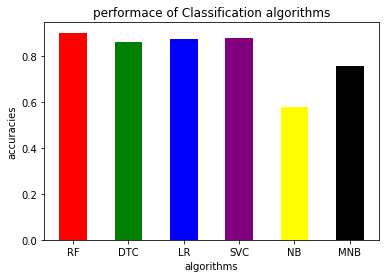

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plot = [RF,DTC,LR,svm,NB,mnb]
name = ['RF','DTC','LR','SVC','NB','MNB']


tick_label = ['RF','DTC','LR','SVC','NB','MNB'] 
  
plt.bar(name,plot, tick_label = tick_label, 
        width = 0.5, color = ['red', 'green','blue','purple','yellow','black']) 
   
plt.xlabel('algorithms') 
plt.ylabel('accuracies') 
plt.title('performace of Classification algorithms') 
plt.show() 


# STACK_OVERFLOW_DATASET

In [46]:
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv('stack-overflow-data.csv')
data.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
post    40000 non-null object
tags    40000 non-null object
dtypes: object(2)
memory usage: 625.1+ KB


In [49]:
data.isnull().sum()

post    0
tags    0
dtype: int64

In [50]:
count_tag = data.groupby('tags').aggregate({'post':np.count_nonzero}).reset_index().rename(columns = {'post':'tag_count'})
count_tag

,tags,tag_count
0,.net,2000
1,android,2000
2,angularjs,2000
3,asp.net,2000
4,c,2000
5,c#,2000
6,c++,2000
7,css,2000
8,html,2000
9,ios,2000


In [51]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
data['tags'] = lbe.fit_transform(data['tags'])
#data.head()

In [192]:
import re
f1_text = data.post[0]
text = re.sub("[^a-zA-Z]"," ",f1_text)
text=text.lower()

In [193]:
# removel of stopwords
import nltk
from nltk.corpus import stopwords
text = nltk.word_tokenize(text)

In [194]:
import nltk as nlp
lem = nlp.WordNetLemmatizer()
text= [lem.lemmatize(i) for i in text]
#text
text = "".join(text)
#text

In [195]:
import nltk as nlp
text_list = []
for i in data.post:
    text = re.sub("[^a-zA-Z]"," ",i)
    text =text.lower()
    text=nltk.word_tokenize(text)
    lem=nlp.WordNetLemmatizer()
    text=[lem.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)
#text_list[:10]


In [196]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparse_matrix= cou_vec.fit_transform(text_list).toarray()


In [197]:
y = data.iloc[:,1].values
X = sparse_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.20)


### MODEL SELECTION 

In [198]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [199]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
lrg  = LogisticRegression()
lrg.fit(X_train,y_train)
y_pred_lr  = lrg.predict(X_test)
LR = accuracy_score(y_pred_lr,y_test)
print("LR accuracy:-",accuracy_score(y_pred_lr,y_test))


LR accuracy:- 0.766125


In [221]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       407
           1       0.85      0.90      0.87       377
           2       0.95      0.98      0.97       418
           3       0.70      0.73      0.71       374
           4       0.80      0.80      0.80       413
           5       0.53      0.53      0.53       396
           6       0.75      0.74      0.75       381
           7       0.83      0.82      0.82       423
           8       0.71      0.70      0.70       417
           9       0.58      0.59      0.58       379
          10       0.65      0.60      0.63       453
          11       0.80      0.82      0.81       377
          12       0.79      0.83      0.81       396
          13       0.83      0.86      0.85       387
          14       0.82      0.79      0.81       402
          15       0.66      0.59      0.62       406
          16       0.80      0.82      0.81       364
          17       0.89    

In [205]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators = 200,random_state=0)
RF_clf.fit(X_train,y_train)
y_pred_rf  = RF_clf.predict(X_test)
RF = accuracy_score(y_pred_rf,y_test)
print("\nRF accuracy:-",accuracy_score(y_pred_rf,y_test))


RF accuracy:- 0.79475


In [217]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       419
           1       0.85      0.96      0.90       355
           2       0.97      0.98      0.97       425
           3       0.77      0.81      0.79       370
           4       0.85      0.78      0.81       451
           5       0.66      0.56      0.61       469
           6       0.74      0.82      0.78       343
           7       0.85      0.85      0.85       412
           8       0.69      0.70      0.70       402
           9       0.64      0.62      0.63       393
          10       0.64      0.64      0.64       424
          11       0.78      0.93      0.85       324
          12       0.79      0.81      0.80       410
          13       0.87      0.82      0.85       428
          14       0.84      0.89      0.87       368
          15       0.68      0.68      0.68       363
          16       0.84      0.86      0.85       362
          17       0.92    

In [201]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state = 50)
DT_clf.fit(X_train,y_train)
y_pred_dt  = DT_clf.predict(X_test)
DT = accuracy_score(y_pred_dt,y_test)
print("\nDT accuracy:-",accuracy_score(y_pred_dt,y_test))



DT accuracy:- 0.703625


In [218]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57       416
           1       0.83      0.86      0.84       385
           2       0.93      0.94      0.93       423
           3       0.65      0.65      0.65       388
           4       0.74      0.74      0.74       411
           5       0.45      0.41      0.43       432
           6       0.68      0.69      0.69       373
           7       0.78      0.77      0.77       424
           8       0.53      0.57      0.55       384
           9       0.55      0.55      0.55       375
          10       0.53      0.55      0.54       411
          11       0.74      0.78      0.76       367
          12       0.67      0.68      0.67       413
          13       0.81      0.77      0.79       426
          14       0.78      0.76      0.77       394
          15       0.58      0.53      0.55       393
          16       0.74      0.76      0.75       365
          17       0.87    

In [203]:
from sklearn import svm
SVM_clf = svm.SVC(kernel='linear')
SVM_clf.fit(X_train,y_train)
y_pred_svc  = SVM_clf.predict(X_test)
SVC = accuracy_score(y_pred_svc,y_test)
print("\nSVC accuracy:-",accuracy_score(y_pred_svc,y_test))



SVC accuracy:- 0.720125


In [219]:
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       493
           1       0.83      0.84      0.84       398
           2       0.93      0.93      0.93       431
           3       0.65      0.68      0.66       373
           4       0.76      0.74      0.75       424
           5       0.49      0.46      0.48       418
           6       0.73      0.68      0.70       407
           7       0.80      0.78      0.79       425
           8       0.68      0.65      0.66       429
           9       0.54      0.52      0.53       398
          10       0.57      0.61      0.59       390
          11       0.71      0.79      0.75       348
          12       0.74      0.77      0.76       401
          13       0.77      0.82      0.80       377
          14       0.80      0.74      0.77       418
          15       0.54      0.56      0.55       347
          16       0.76      0.80      0.78       354
          17       0.85    

In [204]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_nb  = NB.predict(X_test)
NB_clf = accuracy_score(y_pred_nb,y_test)
print("\nNB accuracy:-",accuracy_score(y_pred_nb,y_test))



NB accuracy:- 0.467875


In [220]:
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.43      0.31      0.36       560
           1       0.55      0.85      0.66       260
           2       0.89      0.79      0.83       485
           3       0.28      0.43      0.34       249
           4       0.76      0.42      0.54       758
           5       0.22      0.56      0.32       155
           6       0.57      0.61      0.59       353
           7       0.86      0.36      0.50      1004
           8       0.09      0.33      0.14       112
           9       0.23      0.37      0.28       233
          10       0.65      0.34      0.45       803
          11       0.37      0.74      0.49       192
          12       0.22      0.52      0.31       178
          13       0.41      0.48      0.44       345
          14       0.26      0.36      0.30       282
          15       0.30      0.61      0.41       181
          16       0.25      0.60      0.35       153
          17       0.39    

###  ACCURACY PERFORMANCE 

In [209]:
from sklearn.metrics import accuracy_score
# 1. LOGISTIC REGRESSION
y_pred  = lrg.predict(X_test)
LR = accuracy_score(y_pred,y_test)
print("LR accuracy:-",accuracy_score(y_pred,y_test))
# 2. RANDOM FOREST
y_pred  = RF_clf.predict(X_test)
RF = accuracy_score(y_pred,y_test)
print("\nRF accuracy:-",accuracy_score(y_pred,y_test))
# 3.DECISION TREE
y_pred  = DT_clf.predict(X_test)
DT = accuracy_score(y_pred,y_test)
print("\nDT accuracy:-",accuracy_score(y_pred,y_test))
# 4. SVClassifier 
y_pred  = SVM_clf.predict(X_test)
SVC = accuracy_score(y_pred,y_test)
print("\nSVC accuracy:-",accuracy_score(y_pred,y_test))
# 5. Naive Bayes
y_pred_nb  = NB.predict(X_test)
NB = accuracy_score(y_pred_nb,y_test)
print("\nNB accuracy:-",accuracy_score(y_pred_nb,y_test))


LR accuracy:- 0.766125

RF accuracy:- 0.79475

DT accuracy:- 0.703625

SVC accuracy:- 0.720125

NB accuracy:- 0.467875


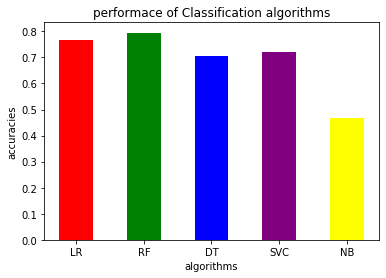

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
plot = [LR,RF,DT,SVC,NB]
name = ['LR','RF','DT','SVC','NB']


tick_label = ['LR','RF','DT','SVC','NB'] 
  
plt.bar(name,plot, tick_label = tick_label, 
        width = 0.5, color = ['red', 'green','blue','purple','yellow']) 
   
plt.xlabel('algorithms') 
plt.ylabel('accuracies') 
plt.title('performace of Classification algorithms') 
plt.show() 
